# Transformer Introduction 
- **Highlights represent activation, showing alignment of words**
- **Removal of the recurrent part & just maintain focus on the encoder/decoder attention mechanism led to improved results, this was named a transformer!**

## 3 Key Changes for Creating New Attention 
- **Positional encoding**
    - Gave the ability to consider the order of a sequence (previously enabled in RNN) of tokens, token activations or embeddings being processed
    - Worked by adding a set of varying sin wave activations to each input embedding 
    - Activations varied based on positioning of word or token 
    
- **Self-attention**
    - Attention mechanism is applied between a word and other words within context 
    - Almost like applying attention to the encoder and the encoder again, allowing the meaning and context to be embedded into its vector representation 

- **Multi-head attention**
    - Several parallel attention mechanisms working together, allowing the relation of several sets 

- **Transformers have a much more rich token/word embedding than anything that had come before them**
- **They internally work off of word or token level embeddings (doesn't help that much for sentences which is why cross encoders were introduced)** 

# Cross Encoders 
- **A core BERT model followed by a FFNN. BERT model accepts 2 sentences at a time which are embedded with very rich word and token level embeddings**
- **FFNN takes the sentences and decides how similar they are (from 0-1)**
- **Works well but not scalable because a full inference computation must be run on BERT to compare sentences (BERT runs once per sentence)**
- **Clustering = n*(n-1) / 2**

# Producing Sentence Embeddings in BERT 
- **Take the mean value across all word embeddings for sentence embedding**
- **Take the sentence embeddings and compare using cosine similarity**
- **This "mean pooling approach" is not accurate enough** 

# SBERT
- **Fine-tunes on sentence pairs using a siamese architecture/network** 
- **Siamese network consists of 2 identical BERT models with tied weights**
![alt text](image-2.png)
- **Mean pooling operation is still being done, but works better due to fine-tuning**

## Softmax Loss Approach (CHECK THIS)
- **Softmax loss is just a cross entropy loss function**
- **Portion of the loss function**
- **Used a premise and hypothesis to train**

## Label Feature Classes 
- **Sentence A is sent in as a premise and sentence B is sent in as hypothesis**
- **"0" - "entailment"** 
    - Indicates that the premise suggests/infers the hypothesis 
- **"1" - "neutral"**
    - Sentences are true but not related (sentences could be about the same topic but don't necessarily infer each other)
- **"2" - "contradiction"**
    - Premise and hypothesis contradict one another 
- **Siamese BERT outputs U and V sentence embeddings which are then concatenated: |U-V|** 
- **Is then passed through a FFNN to output three activations aligning with the three label classes**

![alt text](image-3.png)

In [3]:
from sentence_transformers import SentenceTransformer 

#see sbert.net for models  that can be used
model = SentenceTransformer('bert-base-nli-mean-tokens')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [4]:

sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials"]

embeddings = model.encode(sentences)        #creates embeddings 
embeddings

array([[-0.1889354 ,  0.18380444, -0.5132147 , ..., -0.96228576,
         0.16144854, -0.18547608],
       [-0.02548044, -0.06504352,  0.85490704, ..., -0.08297287,
        -0.2698278 , -0.09522379],
       [-0.0536557 , -0.10092869,  0.99919367, ...,  1.1357744 ,
         0.01794507, -0.2400804 ],
       [ 0.21320131,  1.8518623 ,  0.36619213, ...,  0.00735292,
         0.31327713,  0.41728264],
       [ 0.177124  ,  1.5110041 ,  0.962754  , ...,  0.07071599,
        -0.2715052 ,  0.34254542]], dtype=float32)

In [ ]:
#Semantic Textual Simularity (STS) --> compairson of sentence pairs (most often used for bench marking)\
#Semantic Search --> Information retrieval using semantic meaning. Given a set of sentences, search can be done with a quiere sentence to identify simularities (search based on concepts rather than words).
#Clustering --> cluster sentences for type modeling  

In [5]:
#STS example
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))         #creates a 5x5 array filled with zeros 

for i in range(len(sentences)):                          #loop through sentence embeddings from SBERT and compare using cos simularities 
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])
sim

array([[0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.40914321, 1.        , 0.        , 0.        , 0.        ],
       [0.1090903 , 0.44547978, 1.        , 0.        , 0.        ],
       [0.50074875, 0.30693948, 0.20791672, 1.        , 0.        ],
       [0.29936215, 0.38607216, 0.28499284, 0.63849497, 0.99999994]])

<Axes: >

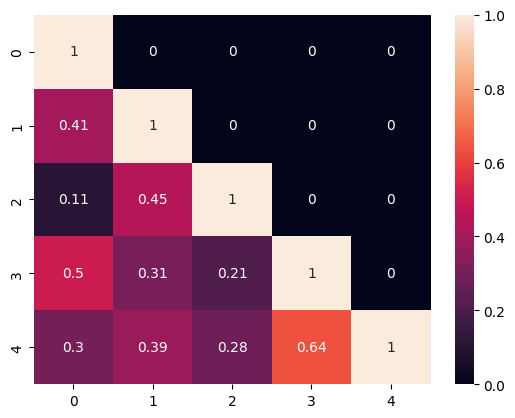

In [9]:
#Visualize the data 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(sim, annot=True)

In [10]:
model = SentenceTransformer('all-mpnet-base-v2')        #Higher performing model 
model                                                   #Has additional normalization function

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

<Axes: >

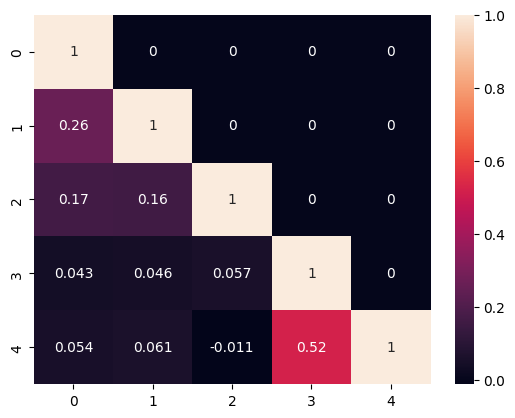

In [11]:
embeddings = model.encode(sentences)
sim = np.zeros((len(sentences), len(sentences)))         #creates a 5x5 array filled with zeros 

for i in range(len(sentences)):                          #loop through sentence embeddings from SBERT and compare using cos simularities 
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sns.heatmap(sim, annot = True)